# GENERAL NOTES FOR THE LABORATORIES

The reference version for python is 3.7.

For the labs we will use Google Colab, but you can run the scripts locally on your pc using a Jupyter Notebook (see the documentation [here](https://jupyter.org/).

To run the codes locally on your pc, we suggest using virutal environments to be able to match libraries versions with your collegues, especially for the competition. Please, have a look at the documentation [here](https://docs.python.org/3.8/library/venv.html).


For any doubt please ask during lectures or send an e-mail to the professor or the teaching assistants:

*   Giulia Boato: giulia.boato[at]unitn.it
*   Federica Lago: federica.lago-1[at]unitn.it
*   Andrea Montibeller: andrea.montibeller[at]unitn.it


# WORKING WITH IMAGES

There are several different libraries available for processing and manipulating images in Python. Among the most common we can list:

*   [skimage](https://scikit-image.org/)
*   [Pillow](https://pillow.readthedocs.io/en/stable/)
*   [OpenCV](https://www.pyimagesearch.com/2018/07/19/opencv-tutorial-a-guide-to-learn-opencv/)


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

**Open** an image and display it

<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'numpy.ndarray'>
Value of top-left pixel: [52 39  7]


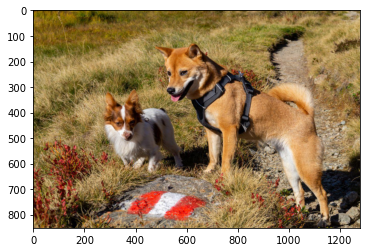

In [3]:
image = Image.open('../Images/test.jpg')
print(type(image))
im = np.asarray(image, dtype=np.uint8)
print(type(im))
print('Value of top-left pixel: ' + str(im[0, 0, :]))

plt.imshow(im)
plt.show()

Extract a color channel and display it

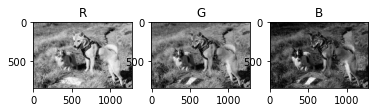

In [4]:
# Plot the 3 separate components
# Pay attention, in openCV images use BGR istead of RGB
plt.subplot(131)
plt.title('R')
plt.imshow(im[:, :, 0], cmap='gray')
plt.subplot(132)
plt.title('G')
plt.imshow(im[:, :, 1], cmap='gray')
plt.subplot(133)
plt.title('B')
plt.imshow(im[:, :, 2], cmap='gray')
plt.show()

Convert color space

<class 'PIL.Image.Image'>
<class 'numpy.ndarray'>


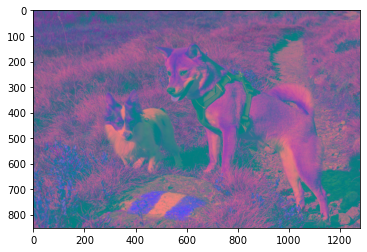

Value of top-left pixel: [ 39 109 137]


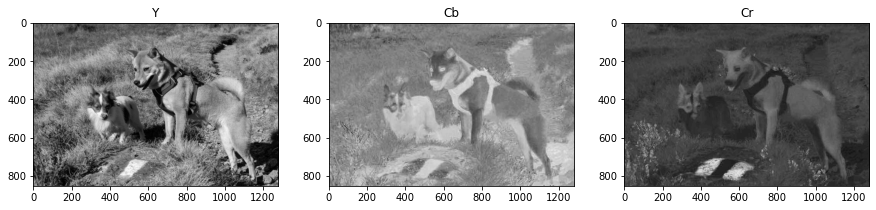

In [5]:
transformed = image.convert('YCbCr')
print(type(transformed))
ycbcr = np.asarray(transformed, dtype=np.uint8)
print(type(ycbcr))

# We cast the transformed values in 3x8 bits per pixel to allow visualization
plt.imshow(ycbcr)
plt.show()

print('Value of top-left pixel: ' + str(ycbcr[0, 0, :]))

plt.figure(figsize=(15, 3))

# Plot the 3 separate components
plt.subplot(131)
plt.title('Y')
plt.imshow(ycbcr[:, :, 0], cmap='gray')
plt.subplot(132)
plt.title('Cb')
plt.imshow(ycbcr[:, :, 1], cmap='gray')
plt.subplot(133)
plt.title('Cr')
plt.imshow(ycbcr[:, :, 2], cmap='gray')
plt.show()

Save a transformed image as JPEG

In [6]:
res = Image.fromarray(ycbcr)
res.save('transformed.jpg')

*Visualize* simple point operations on the L component

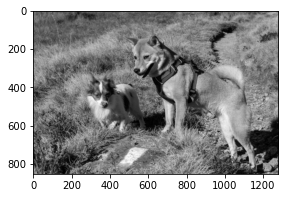

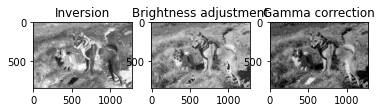

In [7]:
y = ycbcr[:, :, 0]

plt.figure(figsize=(15, 3))
plt.imshow(y, cmap='gray')
plt.show()

# Plot the 3 separate components
plt.subplot(131)
plt.title('Inversion')
plt.imshow(255 - y, cmap='gray')
plt.subplot(132)

plt.title('Brightness adjustment')
plt.imshow(np.asarray(y + 30, np.uint8), cmap='gray')
plt.subplot(133)

plt.title('Gamma correction')
yg = np.asarray(255 * (y / 255) ** 1.2, np.uint8)
plt.imshow(yg, cmap='gray')
plt.show()

Change values of groups of pixels

(852, 1280, 3)
(852, 1280, 3)


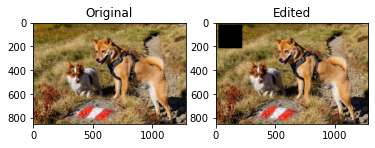

In [8]:
print(im.shape)

edited = np.copy(im)
print(edited.shape)
edited[20:220, 20:220, :] = 0

# Show orginal and edited images side by side
plt.subplot(121)
plt.title('Original')
plt.imshow(image)
plt.subplot(122)
plt.title('Edited')
plt.imshow(edited)
plt.show()

## Exercises

* Change pixels in different regions
* Try changing pixels in different color channels, how does it affect the visual quality of the image?

(852, 1280, 3)
(852, 1280, 3)


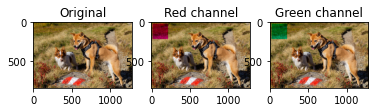

In [9]:
red = np.copy(im)
print(red.shape)
red[20:220, 20:220, 1] = 0

green = np.copy(im)
print(green.shape)
green[20:220, 20:220, 0] = 0

# Show orginal and edited images side by side
plt.subplot(131)
plt.title('Original')
plt.imshow(image)
plt.subplot(132)
plt.title('Red channel')
plt.imshow(red)
plt.subplot(133)
plt.title('Green channel')
plt.imshow(green)
plt.show()


# Image processing


In [10]:
original = Image.open('lena.bmp')
original = np.asarray(original, dtype=np.uint8)
print('Image shape: ', original.shape)

Image shape:  (512, 512)


## AWGN

AWGN (Additive White Gaussian Noise), as the name suggests, is used to add a normally distributed noise to a signal, in our case an image.

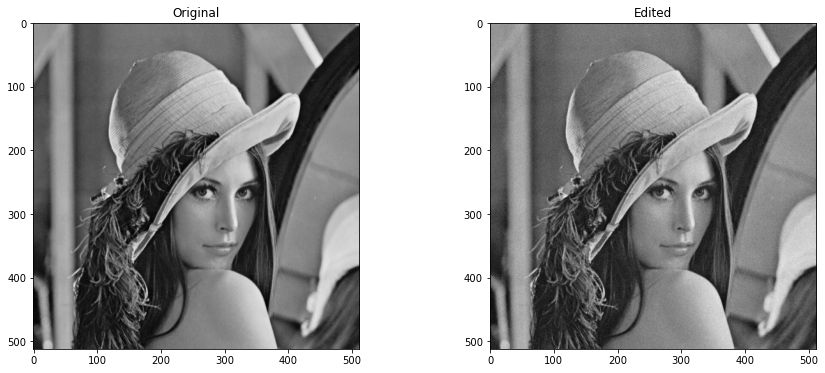

In [11]:
def awgn(img, std, seed):
    mean = 0.0  # some constant
    np.random.seed(seed)
    attacked = img + np.random.normal(mean, std, img.shape)
    attacked = np.clip(attacked, 0, 255)
    return attacked


attacked = awgn(original, 5.0, 123)

# Show orginal and edited images side by side
plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.title('Original')
plt.imshow(original, cmap='gray')
plt.subplot(122)
plt.title('Edited')
plt.imshow(attacked, cmap='gray')
plt.show()

## Blurring

The blurring is used to remove "outlier" pixels that might be caused by noise.

This filter uses a kernel of pixels that, sliding through the whole image, changes the value of the pixel in the middle of the kernel with a weighted average of the values of the pixels in the kernel. In a Gaussian blur, the pixels that are closer to the center of thekernel are given more weight than those far away from the center.

The standard deviations (sigma) of the Gaussian filter, which affects the size of the kernel, can be an integer or a list of two integers.


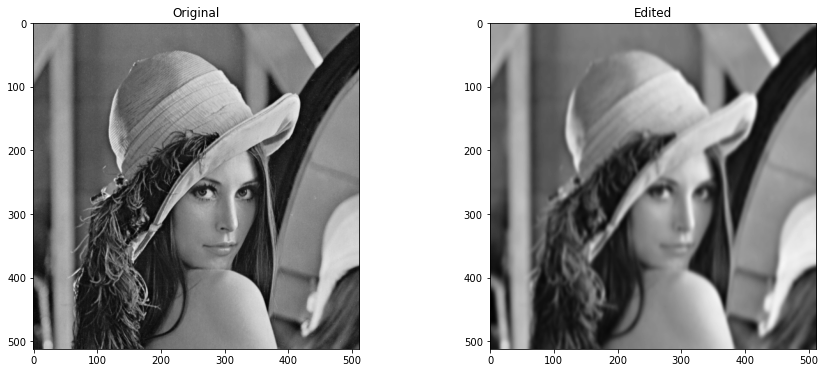

In [12]:
def blur(img, sigma):
    from scipy.ndimage.filters import gaussian_filter
    attacked = gaussian_filter(img, sigma)
    return attacked


attacked = blur(original, [3, 2])

# Show orginal and edited images side by side
plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.title('Original')
plt.imshow(original, cmap='gray')
plt.subplot(122)
plt.title('Edited')
plt.imshow(attacked, cmap='gray')
plt.show()

## Sharpening

The sharpening filter is the reverse of blurring. It is used to enhance details in an image by exaggerating the brightness difference along edges within an image.

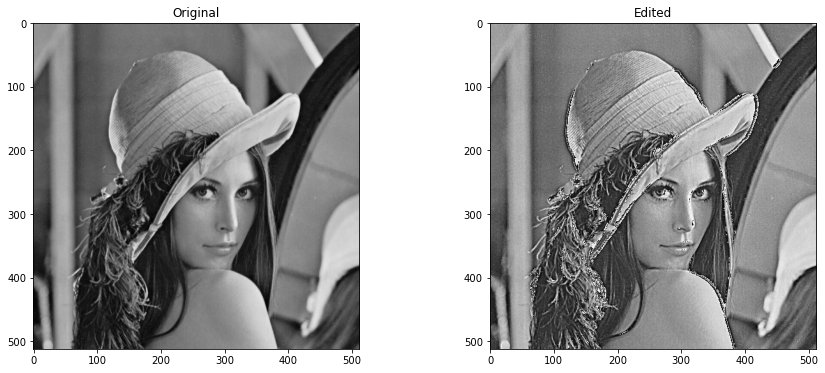

In [25]:
def sharpening(img, sigma, alpha):
    from scipy.ndimage import gaussian_filter

    #print(img/255)
    filter_blurred_f = gaussian_filter(img, sigma)

    attacked = img + alpha * (img - filter_blurred_f)
    return attacked


attacked = sharpening(original, 2, 2)

# Show orginal and edited images side by side
plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.title('Original')
plt.imshow(original, cmap='gray')
plt.subplot(122)
plt.title('Edited')
plt.imshow(attacked, cmap='gray')
plt.show()

## Median filtering

The median filter is a digital filtering technique often used to remove noise from a signal or an image. The filter uses a sliding window that replaces the pixel value at the center of the window with the median of all the pixels in the window.

The kernel_size can be a scalar or an 2-length list giving the size of the median filter window in each dimension. Elements of kernel_size should be odd. If kernel_size is a scalar, then this scalar is used as the size in each dimension.


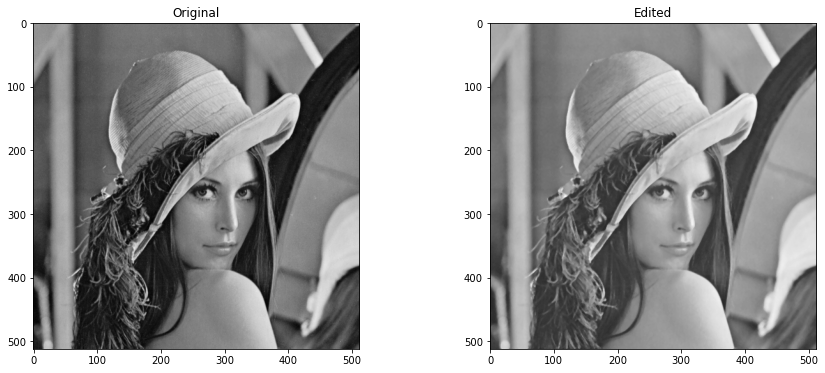

In [14]:
def median(img, kernel_size):
    from scipy.signal import medfilt
    attacked = medfilt(img, kernel_size)
    return attacked


attacked = median(original, 3)

# Show orginal and edited images side by side
plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.title('Original')
plt.imshow(original, cmap='gray')
plt.subplot(122)
plt.title('Edited')
plt.imshow(attacked, cmap='gray')
plt.show()

## Resizing

Resizing is a common operation that can be performed on images.

When an image is downscaled, some information will be lost as the final image willcontain less pixels.

When upscaled the values of the new pixels are estimated using interpolation.

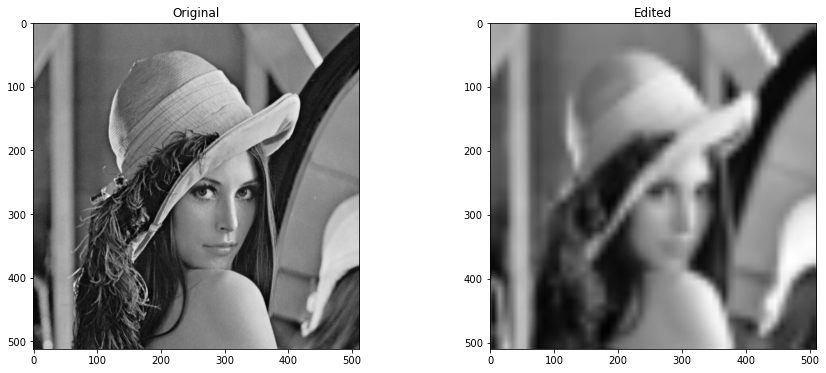

In [15]:
def resizing(img, scale):
    from skimage.transform import rescale
    x, y = img.shape
    attacked = rescale(img, scale)
    attacked = rescale(attacked, 1 / scale)
    attacked = attacked[:x, :y]
    return attacked


attacked = resizing(original, 0.1)

# Show orginal and edited images side by side
plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.title('Original')
plt.imshow(original, cmap='gray')
plt.subplot(122)
plt.title('Edited')
plt.imshow(attacked, cmap='gray')
plt.show()

## JPEG Compression

Image require a lot of bandwidth and storage capacity. Compression is aimed at reducing the amount of data to be transmitted. One of the main standards is JPEG.

The JPEG is a lossy scheme, i.e. some information is lost during the process.
By increasing the compression rate, artifacts appear: blocking, blurring, chromatic aberrations.

In Python we can specify the Quality Factor (QF $\in$ [0, 100]$). They lower the QF the higher the compression rate. 



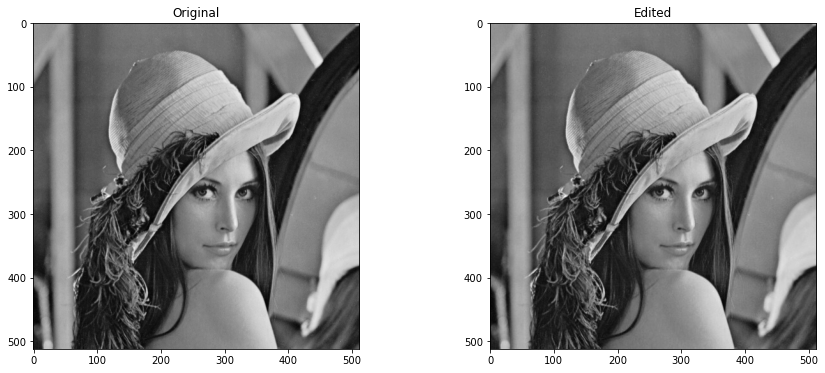

In [16]:
import os


def jpeg_compression(img, QF):
    from PIL import Image
    img = Image.fromarray(img)
    img.save('tmp.jpg', "JPEG", quality=QF)
    attacked = Image.open('tmp.jpg')
    attacked = np.asarray(attacked, dtype=np.uint8)
    os.remove('tmp.jpg')

    return attacked


attacked = jpeg_compression(original, 90)

# Show orginal and edited images side by side
plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.title('Original')
plt.imshow(original, cmap='gray')
plt.subplot(122)
plt.title('Edited')
plt.imshow(attacked, cmap='gray')
plt.show()

## Exercises

* Try different parameters for the attacks and see how these affect the visual quality of the image. Which areas are the most affected by each processing? How do these processing alter the structure of the image?
* Try to combine different attacks

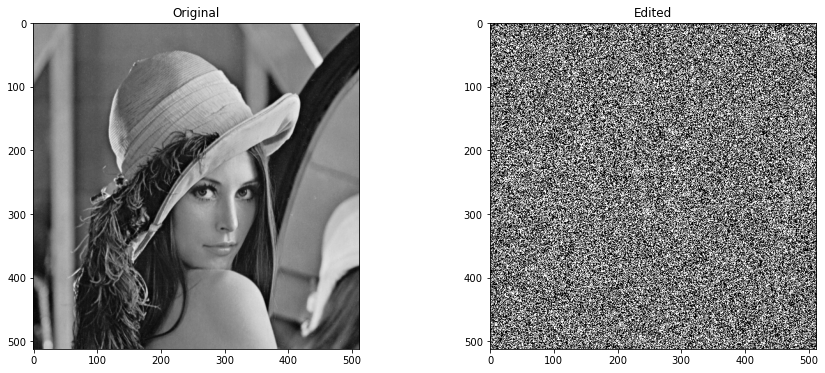

In [17]:
attacked = jpeg_compression(original, 1)
attacked = resizing(attacked, 3)
attacked = resizing(attacked, 0.3)
attacked = blur(attacked, [4, 1])
attacked = sharpening(attacked, 100, 100)
attacked = awgn(attacked, 1500, 12)

# Show orginal and edited images side by side
plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.title('Original')
plt.imshow(original, cmap='gray')
plt.subplot(122)
plt.title('Edited')
plt.imshow(attacked, cmap='gray')
plt.show()
